In [1]:
## imports
import sys
import os
import numpy as np
import xarray as xr
import cmocean
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import gridspec
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import eofs
from eofs.xarray import Eof
import cftime
import nc_time_axis

import mtspec

# from pylab import *

import datetime
import time
import glob, os
import math
import matplotlib.colors as colors

In [2]:
filepath = '/Users/6497241/surfdrive/Documents/PlioMIP2-OHT/Data/Raw_data/HadCM3/'

In [10]:
f = open(filepath+'basin_hadcm3', 'r')

jmt = np.zeros(144)
IB = np.zeros([144, 4])
PB = np.zeros([144, 4])
AB = np.zeros([144, 4])
    
i = 143
for line in f:
    column = line.split()
    jmt[i] = int(column[0])
    IB[i,0] = int(column[1])-2
    IB[i,1] = int(column[2])-2
    IB[i,2] = int(column[3])-2
    IB[i,3] = int(column[4])-2
    PB[i,0] = int(column[5])-2
    PB[i,1] = int(column[6])-2
    PB[i,2] = int(column[7])-2
    PB[i,3] = int(column[8])-2
    AB[i,0] = int(column[9])-2
    AB[i,1] = int(column[10])-2
    AB[i,2] = int(column[11])-2
    AB[i,3] = int(column[12])-2
    i = i-1
f.close()

AB

array([[ -2.,  -2.,  -2.,  -2.],
       [ -2.,  -2.,  -2.,  -2.],
       [ -2.,  -2.,  -2.,  -2.],
       [ -2.,  -2.,  -2.,  -2.],
       [ -2.,  -2.,  -2.,  -2.],
       [ -2.,  -2.,  -2.,  -2.],
       [ -2.,  -2.,  -2.,  -2.],
       [ -2.,  -2.,  -2.,  -2.],
       [ -2.,  -2.,  -2.,  -2.],
       [ -2.,  -2.,  -2.,  -2.],
       [ -2.,  -2.,  -2.,  -2.],
       [ -2.,  -2.,  -2.,  -2.],
       [ -2.,  -2.,  -2.,  -2.],
       [ -2.,  -2.,  -2.,  -2.],
       [ -2.,  -2.,  -2.,  -2.],
       [ -2.,  -2.,  -2.,  -2.],
       [ -2.,  -2.,  -2.,  -2.],
       [ -2.,  -2.,  -2.,  -2.],
       [ -2.,  -2.,  -2.,  -2.],
       [ -2.,  -2.,  -2.,  -2.],
       [ -2.,  -2.,  -2.,  -2.],
       [ -2.,  -2.,  -2.,  -2.],
       [ -2.,  -2.,  -2.,  -2.],
       [ -2.,  -2.,  -2.,  -2.],
       [ -2.,  -2.,  -2.,  -2.],
       [ -2.,  -2.,  -2.,  -2.],
       [ -2.,  -2.,  -2.,  -2.],
       [  0.,  14., 232., 287.],
       [  0.,  14., 232., 287.],
       [  0.,  14., 232., 287.],
       [  

In [11]:
ds = xr.open_dataset(filepath+'Eoi400/'+'Eoi400_2400-2499_Annual.nc')
ds.temp

<xarray.DataArray 'temp' (z4: 17, lat4: 73, lon1: 96)>
[119136 values with dtype=float32]
Coordinates:
  * lon1     (lon1) float32 0.0 3.75 7.5 11.25 15.0 ... 345.0 348.8 352.5 356.2
  * lat4     (lat4) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * z4       (z4) float32 1e+03 925.0 850.0 700.0 600.0 ... 50.0 30.0 20.0 10.0
Attributes:
    long_name:  TEMPERATURE ON PRESSURE LEVELS

In [12]:
region_mask = np.zeros([144, 288])
for i in range(144):
    if IB[i,0]>=0:
        region_mask[i,int(IB[i,0]):int(IB[i,1])+1]=1
    if PB[i,0]>=0:
        region_mask[i,int(PB[i,0]):int(PB[i,1])+1]=2
    if AB[i,0]>=0:
        region_mask[i,int(AB[i,0]):int(AB[i,1])+1]=3
    if AB[i,2]>=0:
        region_mask[i,int(AB[i,2]):int(AB[i,3])+1]=3        

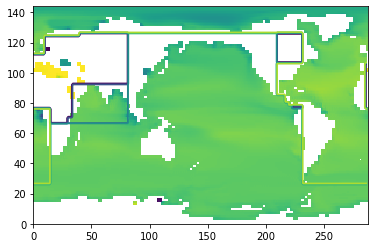

In [13]:
plt.pcolormesh(ds.salinity[0])
plt.contour(region_mask)

In [14]:
dsH = xr.Dataset(data_vars = dict(region=(("lat1", "lon2"), region_mask)), coords = dict(lat1 = ds.lat1.values, lon2 = ds.lon2.values))
xr.Dataset.to_netcdf(dsH, path = '/Users/6497241/surfdrive/Documents/PlioMIP2-OHT/Data/Raw_data/HadCM3/Region_file.nc')